### Senanur Ağaç -  200102002043
### Selen Erdoğan - 1901022038

In [11]:
import librosa

In [12]:
adult_voice, sr_adult = librosa.load('selenbabis.wav')
adult_voice1, sr_adult1 = librosa.load('senababis.wav')
adult_voice2, sr_adult2 = librosa.load('fatihhocam.wav')
adult_voice3, sr_adult2 = librosa.load('selenses.wav')
child_voice, sr_child = librosa.load('a1.wav')
child_voice1, sr_child1 = librosa.load('a4.wav')
child_voice2, sr_child2 = librosa.load('a7.wav')
child_voice3, sr_child2 = librosa.load('kızbebekses.wav')

In [13]:
import numpy as np
fft_adult = np.fft.fft(adult_voice)
fft_adult1 = np.fft.fft(adult_voice1)
fft_adult2 = np.fft.fft(adult_voice2)
fft_adult3 = np.fft.fft(adult_voice3)
fft_child = np.fft.fft(child_voice)
fft_child1 = np.fft.fft(child_voice1)
fft_child2 = np.fft.fft(child_voice2)
fft_child3 = np.fft.fft(child_voice3)

In [14]:
fft_adult = np.abs(fft_adult)
fft_adult1 = np.abs(fft_adult1)
fft_adult2 = np.abs(fft_adult2)
fft_adult3 = np.abs(fft_adult3)
fft_child = np.abs(fft_child)
fft_child1 = np.abs(fft_child1)
fft_child2 = np.abs(fft_child2)
fft_child3 = np.abs(fft_child3)

#### Veri setlerinin fourier analizleri

#### 1. veri seti --> selenbabis.wav - a4.wav

adult.wav Spectrum:


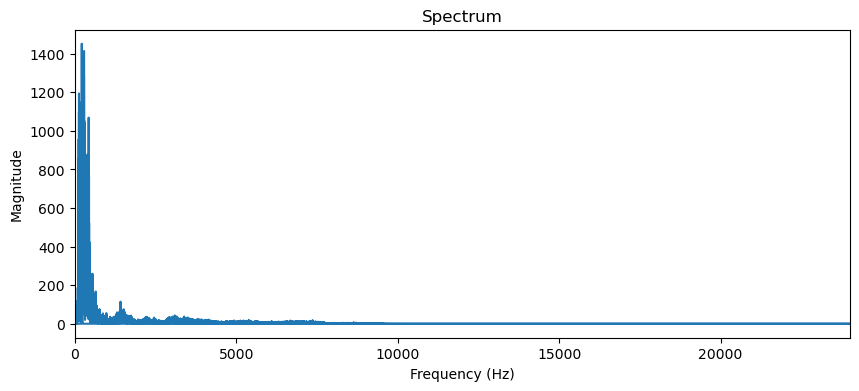

child.wav Spectrum:


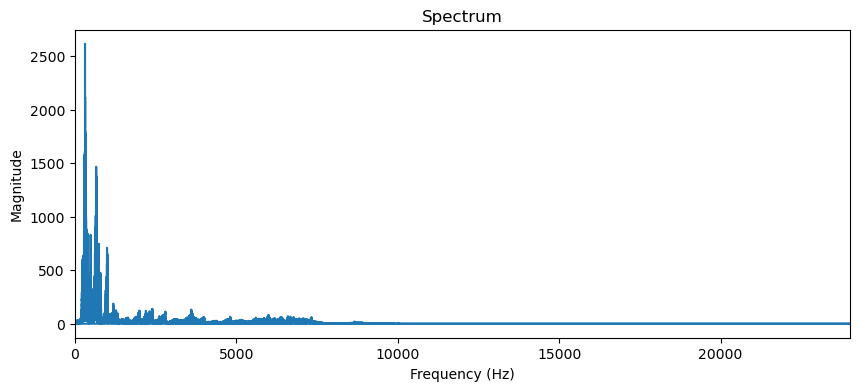

In [15]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def plot_spectrum(file_path):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# adult.wav dosyasının spektrumünü çizin
print("adult.wav Spectrum:")
plot_spectrum('selenbabis.wav')

# child.wav dosyasının spektrumünü çizin
print("child.wav Spectrum:")
plot_spectrum('a4.wav')

#### 2. veri seti --> senababis.wav - a1.wav

adult.wav Spectrum:


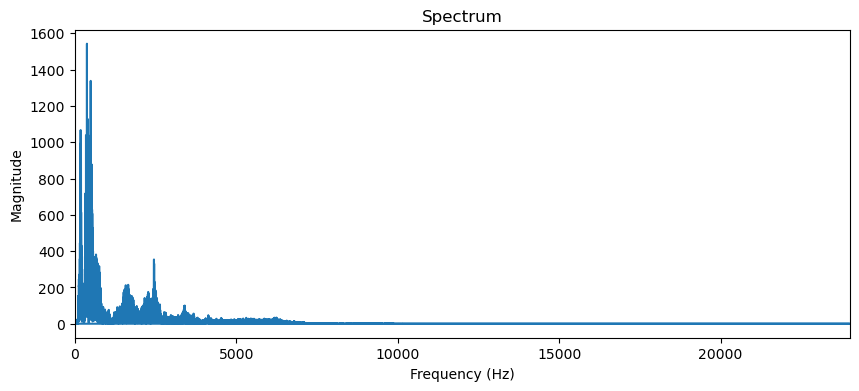

child.wav Spectrum:


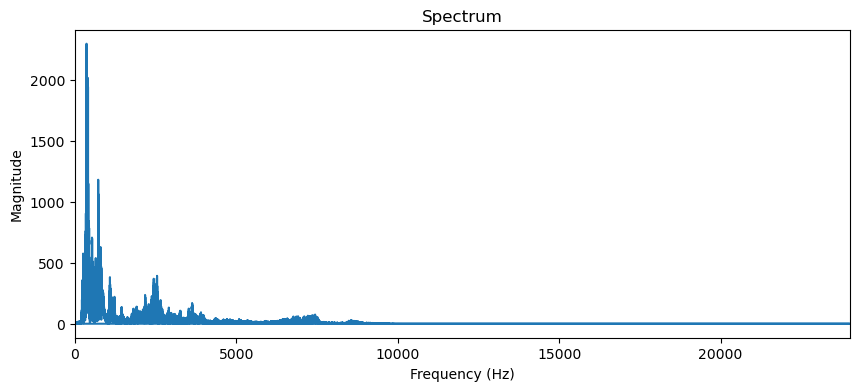

In [16]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def plot_spectrum(file_path):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# adult.wav dosyasının spektrumünü çizin
print("adult.wav Spectrum:")
plot_spectrum('senababis.wav')

# child.wav dosyasının spektrumünü çizin
print("child.wav Spectrum:")
plot_spectrum('a1.wav')

#### 3. veri seti --> fatihhocam.wav - a7.wav

adult.wav Spectrum:


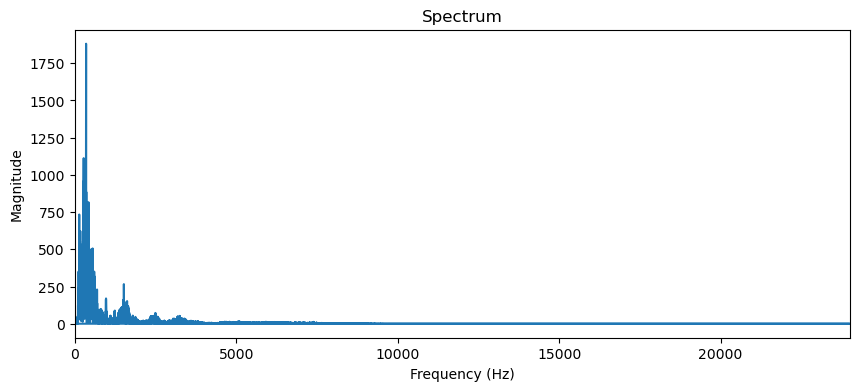

child.wav Spectrum:


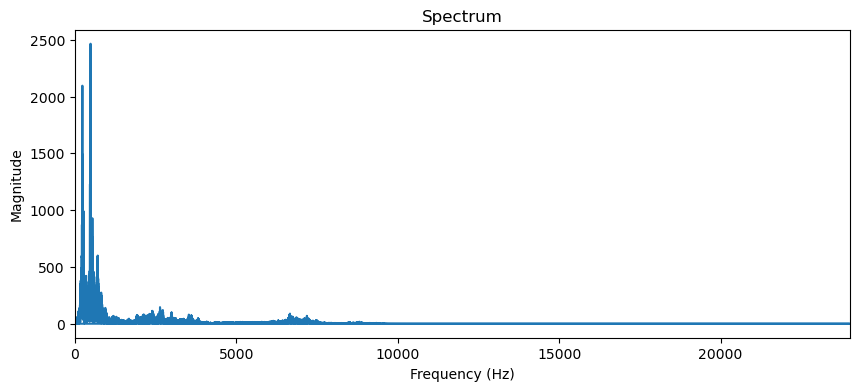

In [17]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def plot_spectrum(file_path):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# adult.wav dosyasının spektrumünü çizin
print("adult.wav Spectrum:")
plot_spectrum('fatihhocam.wav')

# child.wav dosyasının spektrumünü çizin
print("child.wav Spectrum:")
plot_spectrum('a7.wav')

### Bu projede veri setleri incelenmiş olup bu bağlamda ses ayrımları ve ve analizleri için bant geçiren filtre ve yüksek geçiren filtre kullanılmasına karar verilmiştir. Filtreler pyfda aracılığı ile oluşturulmuştur.

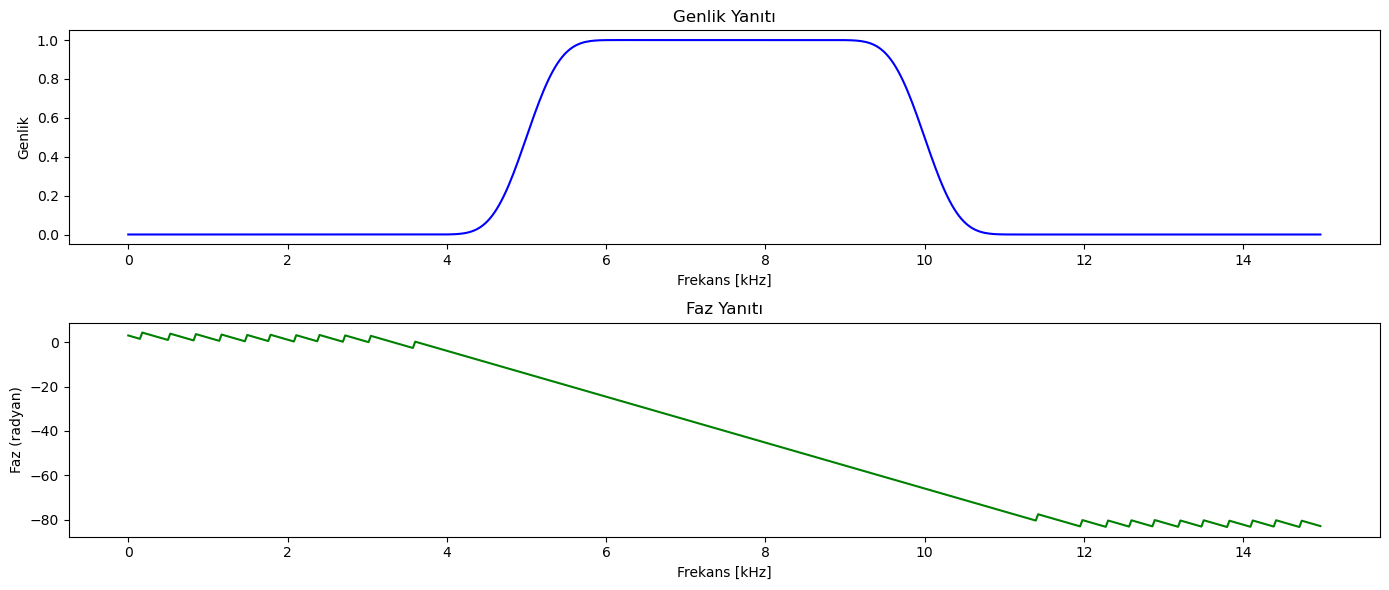

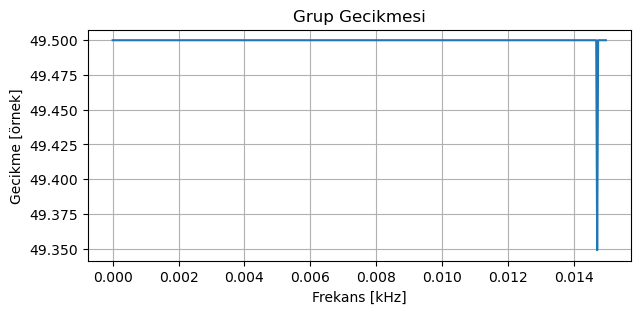

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import loadmat
Fs=30
# pyFDA'de tasarlanmış olan BPF (Bant Geçiren Filtre) verisinin çağırılması
BPF_data = loadmat('bantgeciren.mat') # BPF verisinin açılması
Coeffs = BPF_data['ba'].astype(float) # veriden değişkenlerin çekilmesi

BPFb = Coeffs[0] # değişkenlerin içinden b' verisinin çekilmesi
BPFa = np.zeros(len(BPFb)) # FIR filtre olduğu için a verisinin b uzunluğunda boş tanımlanması
BPFa[0] = 1 # dizinin sadece ilk değerine 1 atanması bu şekilde loadmat gibi yükle

# frekans yanıtını hesaplamak
w, h = signal.freqz(BPFb) 
freq_hz = w / (2 * np.pi) * (Fs) # Frekans birimini kHz olarak hesaplamak (Fs, örnekleme frekansı)

# Genlik yanıtını çizmek
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz, abs(h), 'b')
plt.title('Genlik Yanıtı')
plt.ylabel('Genlik')
plt.xlabel('Frekans [kHz]')

# Faz yanıtını çizmek
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(h))
plt.plot(freq_hz, angles, 'g')
plt.title('Faz Yanıtı')
plt.ylabel('Faz (radyan)')
plt.xlabel('Frekans [kHz]')

plt.tight_layout()
plt.show()

w, gd = signal.group_delay((BPFb,BPFa))
freq_hz = w / (2 * np.pi) * (Fs/1000) # Frekans birimini kHz olarak hesaplamak (Fs, örnekleme frekansı)
plt.figure(figsize=(7, 3))
plt.plot(freq_hz, gd)
plt.title('Grup Gecikmesi')
plt.xlabel('Frekans [kHz]')
plt.ylabel('Gecikme [örnek]')
plt.grid(True)
plt.show()

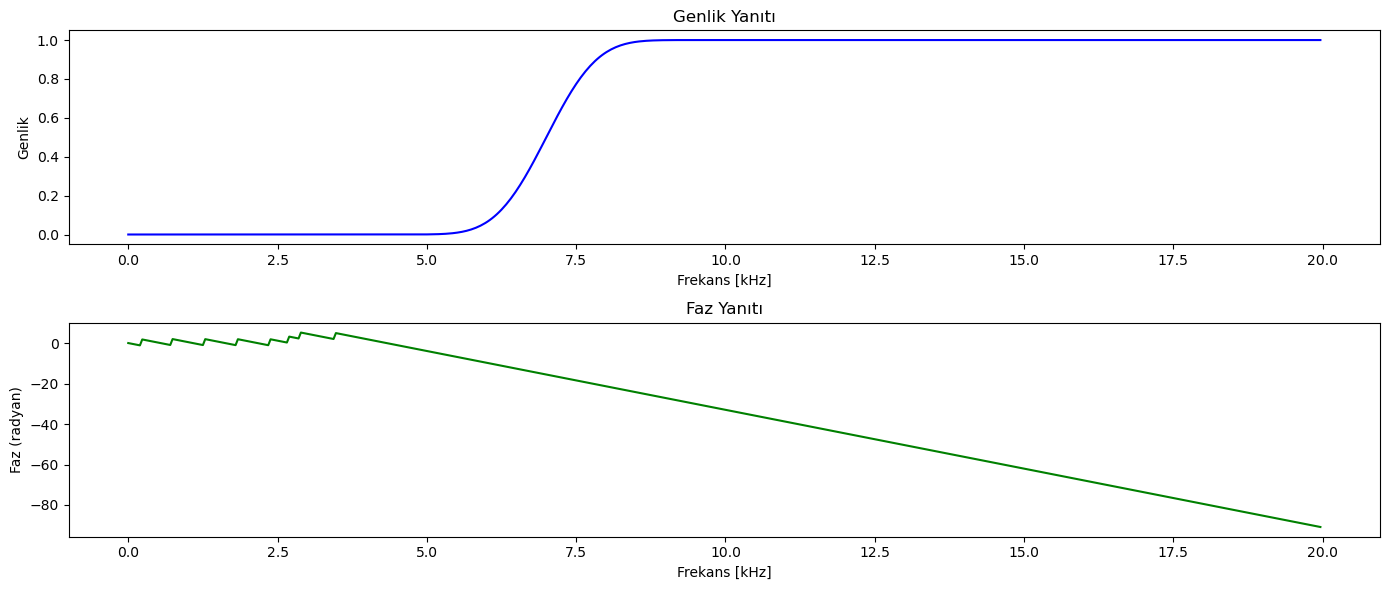

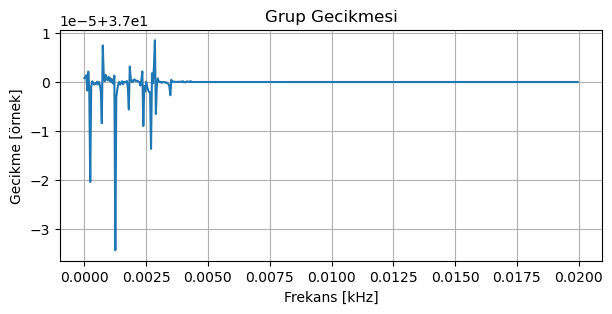

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import loadmat

Fs = 40

# pyFDA'de tasarlanmış olan HPF (Yüksek Geçiren Filtre) verisinin çağırılması
HPF_data = loadmat('highpass.mat')  # HPF verisinin açılması
Coeffs = HPF_data['ba'].astype(float)  # veriden değişkenlerin çekilmesi

HPFb = Coeffs[0]  # değişkenlerin içinden b' verisinin çekilmesi
HPFa = np.zeros(len(HPFb))  # FIR filtre olduğu için a verisinin b uzunluğunda boş tanımlanması
HPFa[0] = 1  # dizinin sadece ilk değerine 1 atanması bu şekilde loadmat gibi yükle

# frekans yanıtını hesaplamak
w, h = signal.freqz(HPFb, HPFa)
freq_hz = w / (2 * np.pi) * Fs  # Frekans birimini kHz olarak hesaplamak (Fs, örnekleme frekansı)

# Genlik yanıtını çizmek
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz, abs(h), 'b')
plt.title('Genlik Yanıtı')
plt.ylabel('Genlik')
plt.xlabel('Frekans [kHz]')

# Faz yanıtını çizmek
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(h))
plt.plot(freq_hz, angles, 'g')
plt.title('Faz Yanıtı')
plt.ylabel('Faz (radyan)')
plt.xlabel('Frekans [kHz]')

plt.tight_layout()
plt.show()

w, gd = signal.group_delay((HPFb, HPFa))
freq_hz = w / (2 * np.pi) * (Fs / 1000)  # Frekans birimini kHz olarak hesaplamak (Fs, örnekleme frekansı)
plt.figure(figsize=(7, 3))
plt.plot(freq_hz, gd)
plt.title('Grup Gecikmesi')
plt.xlabel('Frekans [kHz]')
plt.ylabel('Gecikme [örnek]')
plt.grid(True)
plt.show()


#### Veri Setlerinin Filtrelenmiş Halleri 

# 1. veri seti için :


### Bant Geçiren Filtre -->

adult.wav Filtered Spectrum:


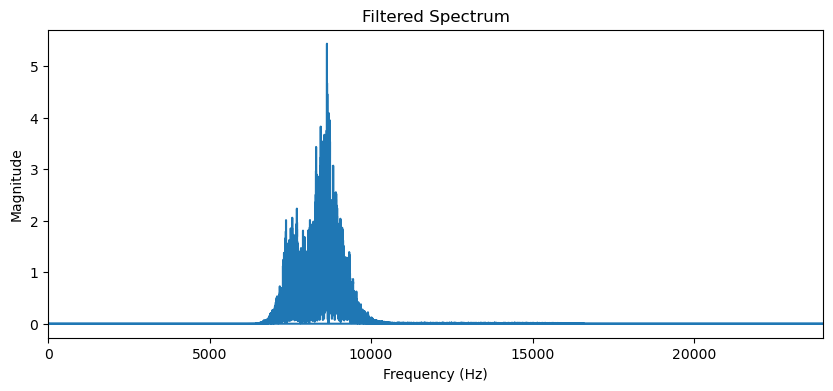

child.wav Filtered Spectrum:


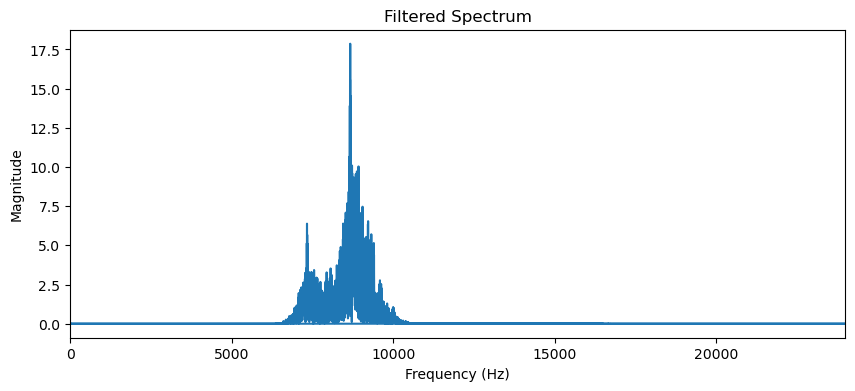

In [21]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_filtered_spectrum(file_path, BPFb):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Filtreden geçirme işlemi
    filtered_audio = np.convolve(audio, BPFb, mode='same')

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(filtered_audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Filtered Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# ikili.mat filtrenizin katsayılarını yükleyin
BPF_data = loadmat('bantgeciren.mat')
Coeffs = BPF_data['ba'].astype(float)
BPFb = Coeffs[0]

# adult.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("adult.wav Filtered Spectrum:")
plot_filtered_spectrum('selenbabis.wav', BPFb)

# child.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("child.wav Filtered Spectrum:")
plot_filtered_spectrum('a4.wav', BPFb)


### Yüksek Geçiren Filtre : 

adult.wav Filtered Spectrum:


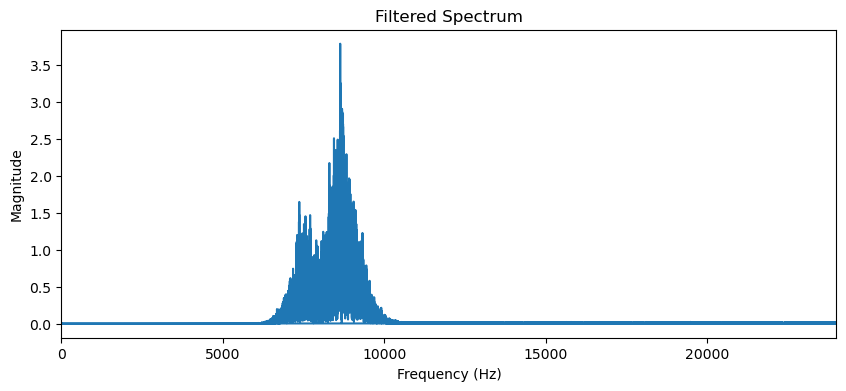

child.wav Filtered Spectrum:


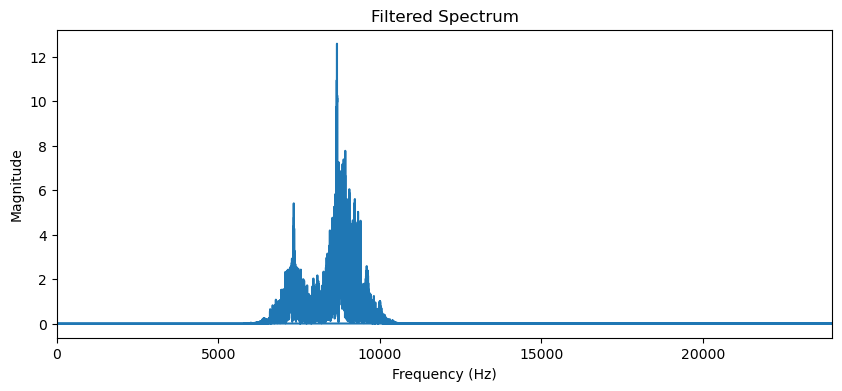

In [22]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_filtered_spectrum(file_path, HPFb):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Filtreden geçirme işlemi
    filtered_audio = np.convolve(audio, HPFb, mode='same')

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(filtered_audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Filtered Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# ikili.mat filtrenizin katsayılarını yükleyin
HPF_data = loadmat('highpass.mat')
Coeffs = HPF_data['ba'].astype(float)
HPFb = Coeffs[0]

# adult.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("adult.wav Filtered Spectrum:")
plot_filtered_spectrum('selenbabis.wav', HPFb)

# child.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("child.wav Filtered Spectrum:")
plot_filtered_spectrum('a4.wav', HPFb)


# 2. veri seti için :

### Bant Geçiren Filtre-->

adult.wav Filtered Spectrum:


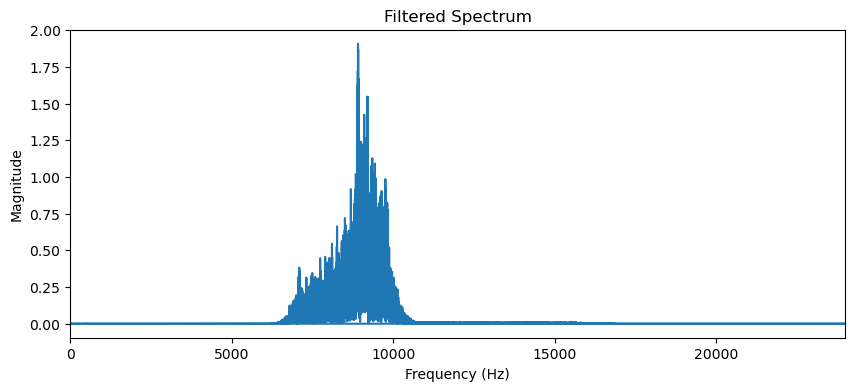

child.wav Filtered Spectrum:


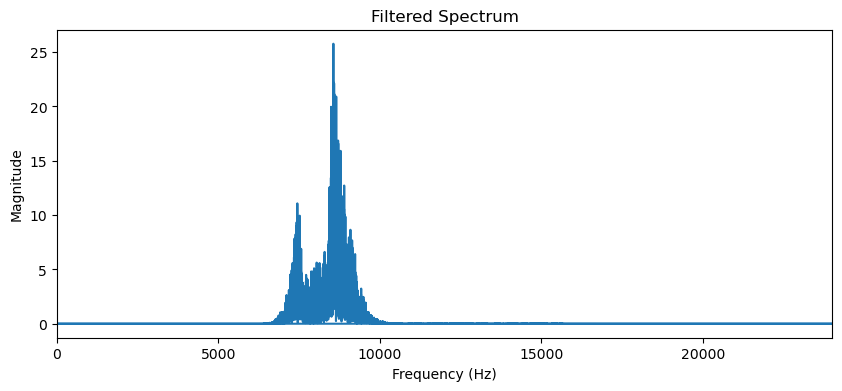

In [23]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_filtered_spectrum(file_path, BPFb):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Filtreden geçirme işlemi
    filtered_audio = np.convolve(audio, BPFb, mode='same')

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(filtered_audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Filtered Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# ikili.mat filtrenizin katsayılarını yükleyin
BPF_data = loadmat('bantgeciren.mat')
Coeffs = BPF_data['ba'].astype(float)
BPFb = Coeffs[0]

# adult.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("adult.wav Filtered Spectrum:")
plot_filtered_spectrum('senababis.wav', BPFb)

# child.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("child.wav Filtered Spectrum:")
plot_filtered_spectrum('a1.wav', BPFb)

### Yüksek Geçiren Filtre : 

adult.wav Filtered Spectrum:


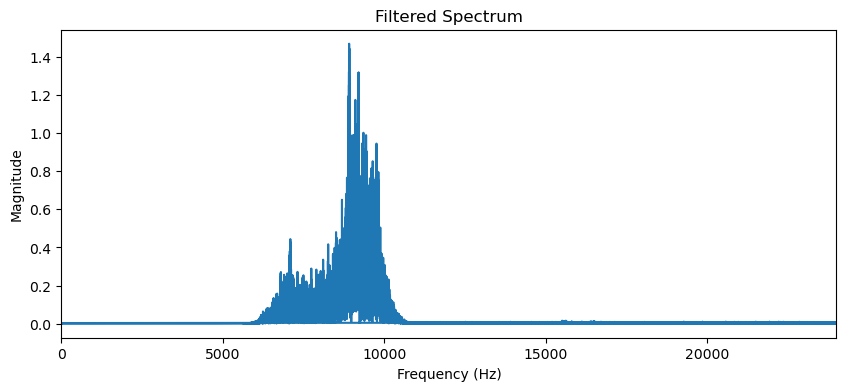

child.wav Filtered Spectrum:


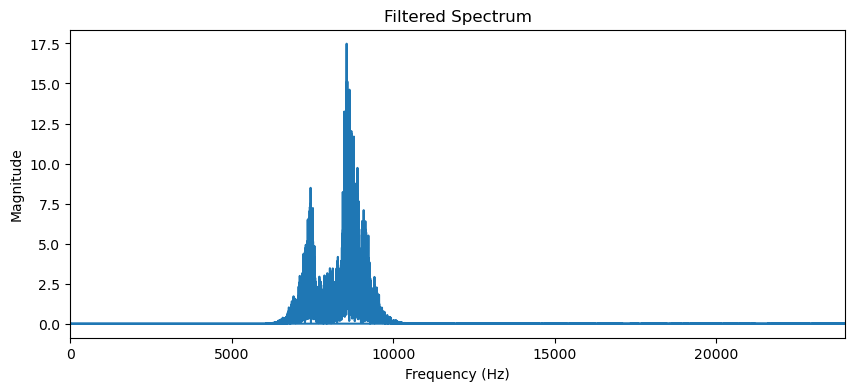

In [24]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_filtered_spectrum(file_path, HPFb):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Filtreden geçirme işlemi
    filtered_audio = np.convolve(audio, HPFb, mode='same')

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(filtered_audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Filtered Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# ikili.mat filtrenizin katsayılarını yükleyin
HPF_data = loadmat('highpass.mat')
Coeffs = HPF_data['ba'].astype(float)
HPFb = Coeffs[0]

# adult.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("adult.wav Filtered Spectrum:")
plot_filtered_spectrum('senababis.wav', HPFb)

# child.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("child.wav Filtered Spectrum:")
plot_filtered_spectrum('a1.wav', HPFb)

# 3. veri seti için :

### Bant Geçiren Filtre-->

adult.wav Filtered Spectrum:


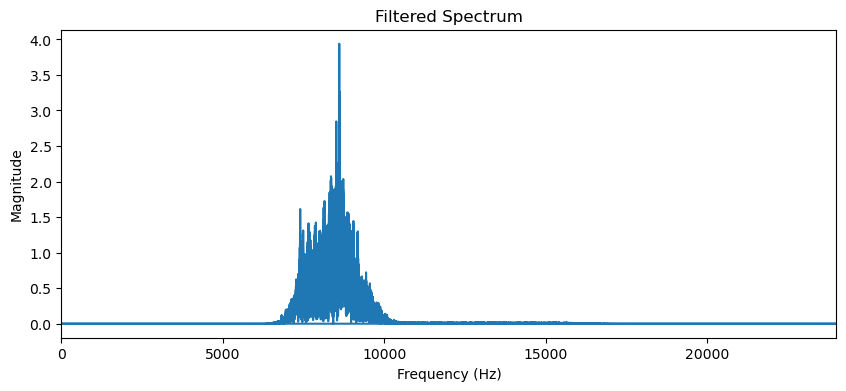

child.wav Filtered Spectrum:


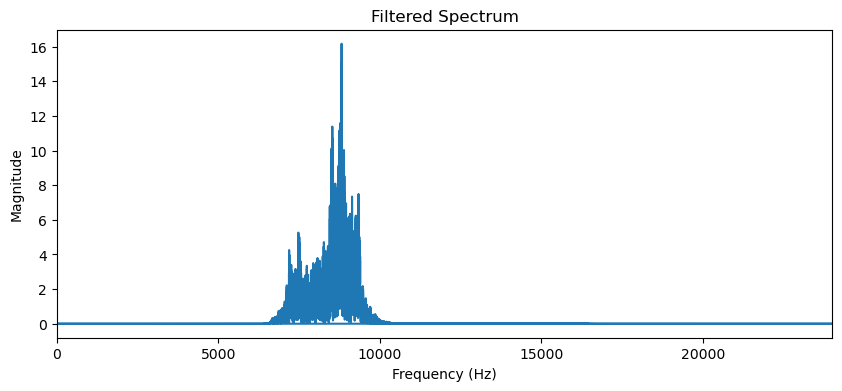

In [25]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_filtered_spectrum(file_path, BPFb):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Filtreden geçirme işlemi
    filtered_audio = np.convolve(audio, BPFb, mode='same')

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(filtered_audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Filtered Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# ikili.mat filtrenizin katsayılarını yükleyin
BPF_data = loadmat('bantgeciren.mat')
Coeffs = BPF_data['ba'].astype(float)
BPFb = Coeffs[0]

# adult.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("adult.wav Filtered Spectrum:")
plot_filtered_spectrum('fatihhocam.wav', BPFb)

# child.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("child.wav Filtered Spectrum:")
plot_filtered_spectrum('a7.wav', BPFb)

### Yüksek Geçiren Filtre : 

adult.wav Filtered Spectrum:


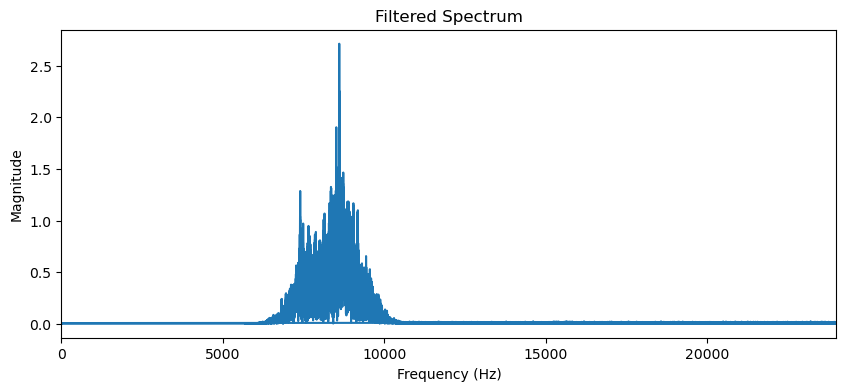

child.wav Filtered Spectrum:


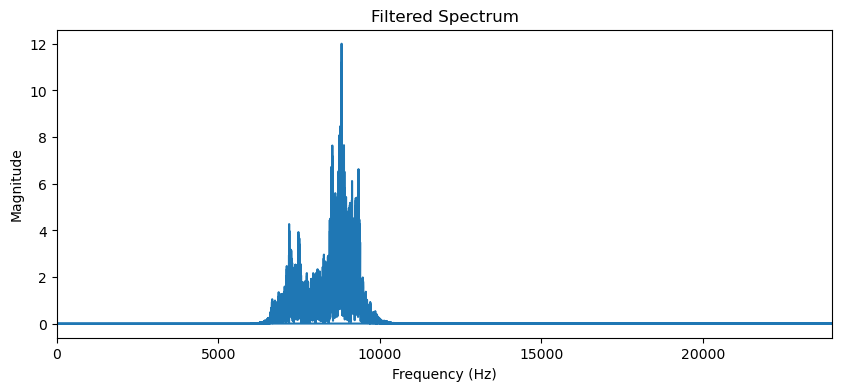

In [26]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_filtered_spectrum(file_path, HPFb):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Filtreden geçirme işlemi
    filtered_audio = np.convolve(audio, HPFb, mode='same')

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(filtered_audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Filtered Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# ikili.mat filtrenizin katsayılarını yükleyin
HPF_data = loadmat('highpass.mat')
Coeffs = HPF_data['ba'].astype(float)
HPFb = Coeffs[0]

# adult.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("adult.wav Filtered Spectrum:")
plot_filtered_spectrum('fatihhocam.wav', HPFb)

# child.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("child.wav Filtered Spectrum:")
plot_filtered_spectrum('a7.wav', HPFb)

### Filtrelerin daha net görünmesi için örnek bir veri seti daha incelenmiştir. Bu veri setinin diğerlerinden farkı ses kayıtlarının daha uzun olmasıdır. Özellikle çocuklardan kısa süreli ses kayıtları aldığımız için bu veri setinde çok daha doğru sonuçlar elde edilebilmiştir. Bu veri setinde kız çocuk sesi ve kadın sesi kullanılmıştır. 

### Spekturum Analizi 

adult.wav Spectrum:


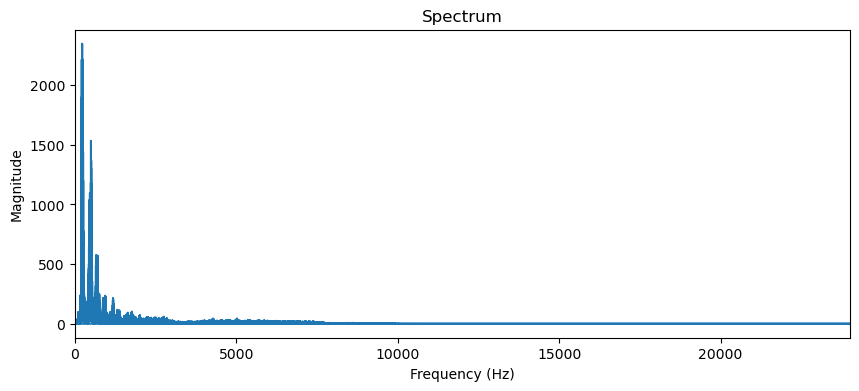

child.wav Spectrum:


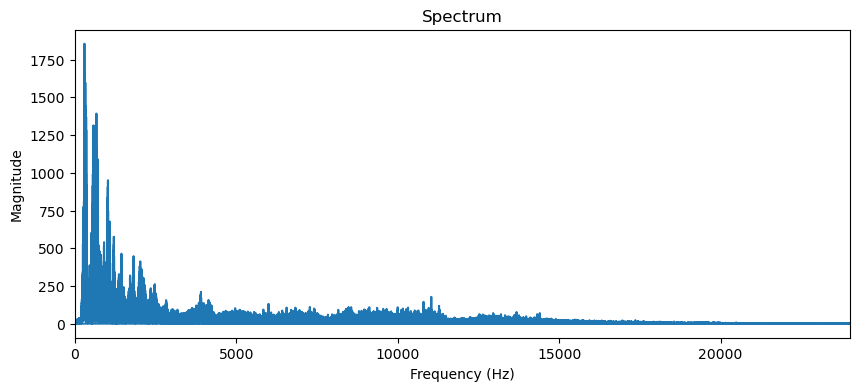

In [27]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def plot_spectrum(file_path):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# adult.wav dosyasının spektrumünü çizin
print("adult.wav Spectrum:")
plot_spectrum('selenses.wav')

# child.wav dosyasının spektrumünü çizin
print("child.wav Spectrum:")
plot_spectrum('kızbebekses.wav')

### Bant Geçiren Filtre-->

adult.wav Filtered Spectrum:


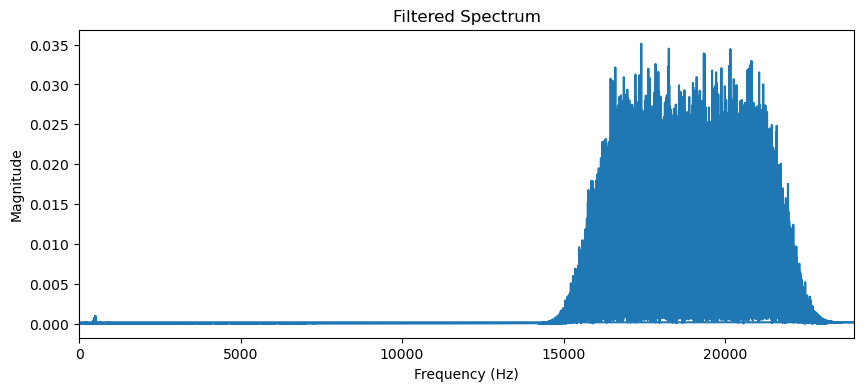

child.wav Filtered Spectrum:


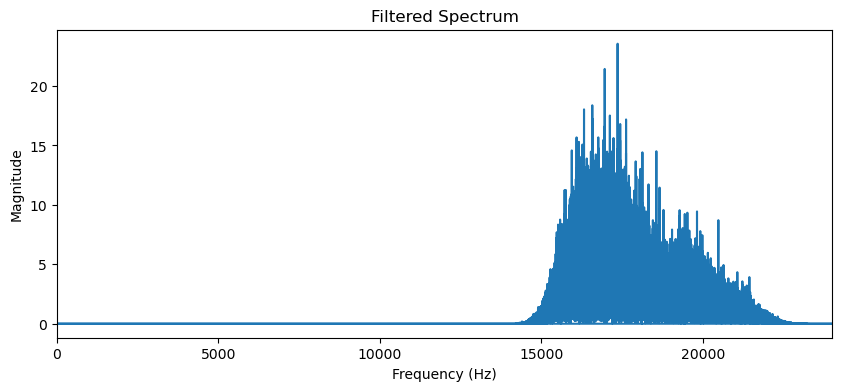

In [28]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_filtered_spectrum(file_path, BPFb):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Filtreden geçirme işlemi
    filtered_audio = np.convolve(audio, BPFb, mode='same')

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(filtered_audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Filtered Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# ikili.mat filtrenizin katsayılarını yükleyin
BPF_data = loadmat('verideneme.mat')
Coeffs = BPF_data['ba'].astype(float)
BPFb = Coeffs[0]

# adult.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("adult.wav Filtered Spectrum:")
plot_filtered_spectrum('selenses.wav', BPFb)

# child.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("child.wav Filtered Spectrum:")
plot_filtered_spectrum('kızbebekses.wav', BPFb)

### Yüksek Geçiren Filtre-->

adult.wav Filtered Spectrum:


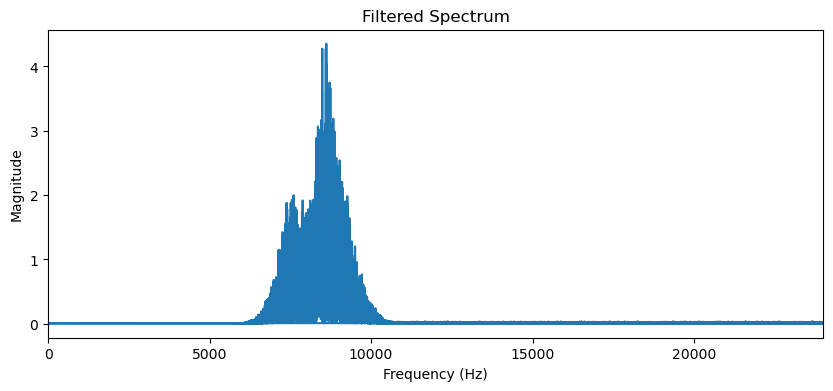

child.wav Filtered Spectrum:


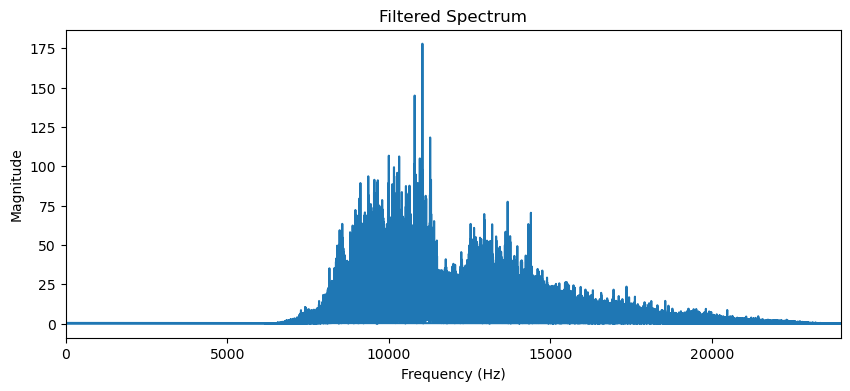

In [29]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_filtered_spectrum(file_path, HPFb):
    # Ses dosyasını yükleyin ve örnekleme frekansını elde edin
    sr, audio = wavfile.read(file_path)

    # Ses sinyalini normalleştirin
    audio = audio / np.max(np.abs(audio))

    # Filtreden geçirme işlemi
    filtered_audio = np.convolve(audio, HPFb, mode='same')

    # Fourier dönüşümünü alın
    spectrum = np.fft.fft(filtered_audio)

    # Frekans bileşenlerini hesaplayın
    frequencies = np.fft.fftfreq(len(spectrum), 1/sr)

    # Spektrum grafiğini çizin
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, np.abs(spectrum))
    plt.title('Filtered Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr/2)  # Yalnızca pozitif frekansları göstermek için sınırları ayarlayın
    plt.show()

# ikili.mat filtrenizin katsayılarını yükleyin
HPF_data = loadmat('highpass.mat')
Coeffs = HPF_data['ba'].astype(float)
HPFb = Coeffs[0]

# adult.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("adult.wav Filtered Spectrum:")
plot_filtered_spectrum('selenses.wav', HPFb)

# child.wav dosyasının filtreden geçmiş genlik spektrumunu çizin
print("child.wav Filtered Spectrum:")
plot_filtered_spectrum('kızbebekses.wav', HPFb)

Yukarıdaki filtrelenmiş sinyaller ve spekturum analizleri incelendiğinde filtreleme işlemlerinin başarılı olduğu çok daha net gözükmektedir.

## Analiz Kısmı

## 1. veri seti için

### Yüksek geçiren filtre için anlama fonksiyonu

In [30]:
import numpy as np
from scipy.io import wavfile
from scipy.io import loadmat

def get_max_magnitude(file_path, HPFb):
    # Read the audio file and obtain the sampling rate
    sr, audio = wavfile.read(file_path)

    # Normalize the audio signal
    audio = audio / np.max(np.abs(audio))

    # Apply the filter
    filtered_audio = np.convolve(audio, HPFb, mode='same')

    # Take the Fourier Transform
    spectrum = np.fft.fft(filtered_audio)

    # Get the magnitude of the spectrum
    magnitude = np.abs(spectrum)

    # Return the maximum magnitude
    return np.max(magnitude)

# Load the coefficients of your high pass filter
HPF_data = loadmat('highpass.mat') # Replace 'version6.mat' with your HPF filter design file
Coeffs = HPF_data['ba'].astype(float)
HPFb = Coeffs[0]

# Get the max magnitude of the filtered amplitude spectrum of the 'adult.wav' file
adult_max_magnitude = get_max_magnitude('selenbabis.wav', HPFb)
print(f"adult.wav Max Magnitude for HPF: {adult_max_magnitude}")

# Get the max magnitude of the filtered amplitude spectrum of the 'child.wav' file
child_max_magnitude = get_max_magnitude('a4.wav', HPFb)
print(f"child.wav Max Magnitude for HPF: {child_max_magnitude}")



adult.wav Max Magnitude for HPF: 3.781746085587157
child.wav Max Magnitude for HPF: 12.5885068193809


In [31]:
def compare_magnitudes1(file_path1, file_path2, HPFb):
    # Get the max magnitudes of the filtered amplitude spectrums
    magnitude1 = get_max_magnitude(file_path1, HPFb)
    magnitude2 = get_max_magnitude(file_path2, HPFb)

    # Compare the maximum magnitudes
    if magnitude1 > magnitude2:
        print(f"The higher magnitude is for {file_path1}, this indicates a child voice.")
        print(f"The lower magnitude is for {file_path2}, this indicates an adult voice.")
    elif magnitude2 > magnitude1:
        print(f"The higher magnitude is for {file_path2}, this indicates a child voice.")
        print(f"The lower magnitude is for {file_path1}, this indicates an adult voice.")
    else:
        print("Both files have the same magnitude.")

# Now call the function with the two audio files you want to compare



In [32]:
compare_magnitudes1('selenbabis.wav', 'a4.wav', HPFb)

The higher magnitude is for a4.wav, this indicates a child voice.
The lower magnitude is for selenbabis.wav, this indicates an adult voice.


### Bant geçiren filtre için anlama fonksiyonu

In [33]:
import numpy as np
from scipy.io import wavfile
from scipy.io import loadmat

def get_max_magnitude(file_path, BPFb):
    # Read the audio file and obtain the sampling rate
    sr, audio = wavfile.read(file_path)

    # Normalize the audio signal
    audio = audio / np.max(np.abs(audio))

    # Apply the filter
    filtered_audio = np.convolve(audio, BPFb, mode='same')

    # Take the Fourier Transform
    spectrum = np.fft.fft(filtered_audio)

    # Get the magnitude of the spectrum
    magnitude = np.abs(spectrum)

    # Return the maximum magnitude
    return np.max(magnitude)

# Load the coefficients of your band pass filter
BPF_data = loadmat('bantgeciren.mat') # Replace 'version6.mat' with your BPF filter design file
Coeffs = BPF_data['ba'].astype(float)
BPFb = Coeffs[0]

# Get the max magnitude of the filtered amplitude spectrum of the 'adult.wav' file
adult_max_magnitude = get_max_magnitude('selenbabis.wav', BPFb)
print(f"adult.wav Max Magnitude for BPF: {adult_max_magnitude}")

# Get the max magnitude of the filtered amplitude spectrum of the 'child.wav' file
child_max_magnitude = get_max_magnitude('a4.wav', BPFb)
print(f"child.wav Max Magnitude for BPF: {child_max_magnitude}")


adult.wav Max Magnitude for BPF: 5.43465526955387
child.wav Max Magnitude for BPF: 17.867929434301463


In [34]:
def compare_magnitudes(file_path1, file_path2, BPFb):
    # Get the max magnitudes of the filtered amplitude spectrums
    magnitude1 = get_max_magnitude(file_path1, BPFb)
    magnitude2 = get_max_magnitude(file_path2, BPFb)

    # Compare the maximum magnitudes
    if magnitude1 > magnitude2:
        print(f"The higher magnitude is for {file_path1}, this indicates a child voice.")
        print(f"The lower magnitude is for {file_path2}, this indicates an adult voice.")
    elif magnitude2 > magnitude1:
        print(f"The higher magnitude is for {file_path2}, this indicates a child voice.")
        print(f"The lower magnitude is for {file_path1}, this indicates an adult voice.")
    else:
        print("Both files have the same magnitude.")


In [35]:

compare_magnitudes('selenbabis.wav', 'a4.wav', BPFb)

The higher magnitude is for a4.wav, this indicates a child voice.
The lower magnitude is for selenbabis.wav, this indicates an adult voice.


## 2. veri seti için

### Yüksek geçiren filtre için anlama fonksiyonu

In [36]:
import numpy as np
from scipy.io import wavfile
from scipy.io import loadmat

def get_max_magnitude(file_path, HPFb):
    # Read the audio file and obtain the sampling rate
    sr, audio = wavfile.read(file_path)

    # Normalize the audio signal
    audio = audio / np.max(np.abs(audio))

    # Apply the filter
    filtered_audio = np.convolve(audio, HPFb, mode='same')

    # Take the Fourier Transform
    spectrum = np.fft.fft(filtered_audio)

    # Get the magnitude of the spectrum
    magnitude = np.abs(spectrum)

    # Return the maximum magnitude
    return np.max(magnitude)

# Load the coefficients of your high pass filter
HPF_data = loadmat('highpass.mat') # Replace 'version6.mat' with your HPF filter design file
Coeffs = HPF_data['ba'].astype(float)
HPFb = Coeffs[0]

# Get the max magnitude of the filtered amplitude spectrum of the 'adult.wav' file
adult_max_magnitude = get_max_magnitude('senababis.wav', HPFb)
print(f"adult.wav Max Magnitude for HPF: {adult_max_magnitude}")

# Get the max magnitude of the filtered amplitude spectrum of the 'child.wav' file
child_max_magnitude = get_max_magnitude('a1.wav', HPFb)
print(f"child.wav Max Magnitude for HPF: {child_max_magnitude}")



adult.wav Max Magnitude for HPF: 1.4688905010560374
child.wav Max Magnitude for HPF: 17.48098771451666


In [37]:
compare_magnitudes1('senababis.wav', 'a1.wav', HPFb)

The higher magnitude is for a1.wav, this indicates a child voice.
The lower magnitude is for senababis.wav, this indicates an adult voice.


### Bant geçiren filtre için anlama fonksiyonu

In [38]:
import numpy as np
from scipy.io import wavfile
from scipy.io import loadmat

def get_max_magnitude(file_path, BPFb):
    # Read the audio file and obtain the sampling rate
    sr, audio = wavfile.read(file_path)

    # Normalize the audio signal
    audio = audio / np.max(np.abs(audio))

    # Apply the filter
    filtered_audio = np.convolve(audio, BPFb, mode='same')

    # Take the Fourier Transform
    spectrum = np.fft.fft(filtered_audio)

    # Get the magnitude of the spectrum
    magnitude = np.abs(spectrum)

    # Return the maximum magnitude
    return np.max(magnitude)

# Load the coefficients of your band pass filter
BPF_data = loadmat('bantgeciren.mat') # Replace 'version6.mat' with your BPF filter design file
Coeffs = BPF_data['ba'].astype(float)
BPFb = Coeffs[0]

# Get the max magnitude of the filtered amplitude spectrum of the 'adult.wav' file
adult_max_magnitude = get_max_magnitude('senababis.wav', BPFb)
print(f"adult.wav Max Magnitude for BPF: {adult_max_magnitude}")

# Get the max magnitude of the filtered amplitude spectrum of the 'child.wav' file
child_max_magnitude = get_max_magnitude('a1.wav', BPFb)
print(f"child.wav Max Magnitude for BPF: {child_max_magnitude}")



adult.wav Max Magnitude for BPF: 1.9079104514146747
child.wav Max Magnitude for BPF: 25.77121050034731


In [39]:

compare_magnitudes('senababis.wav', 'a1.wav', BPFb)

The higher magnitude is for a1.wav, this indicates a child voice.
The lower magnitude is for senababis.wav, this indicates an adult voice.


## 3. veri seti için

### Yüksek geçiren filtre için anlama fonksiyonu

In [40]:
import numpy as np
from scipy.io import wavfile
from scipy.io import loadmat

def get_max_magnitude(file_path, HPFb):
    # Read the audio file and obtain the sampling rate
    sr, audio = wavfile.read(file_path)

    # Normalize the audio signal
    audio = audio / np.max(np.abs(audio))

    # Apply the filter
    filtered_audio = np.convolve(audio, HPFb, mode='same')

    # Take the Fourier Transform
    spectrum = np.fft.fft(filtered_audio)

    # Get the magnitude of the spectrum
    magnitude = np.abs(spectrum)

    # Return the maximum magnitude
    return np.max(magnitude)

# Load the coefficients of your high pass filter
HPF_data = loadmat('highpass.mat') # Replace 'version6.mat' with your HPF filter design file
Coeffs = HPF_data['ba'].astype(float)
HPFb = Coeffs[0]

# Get the max magnitude of the filtered amplitude spectrum of the 'adult.wav' file
adult_max_magnitude = get_max_magnitude('fatihhocam.wav', HPFb)
print(f"adult.wav Max Magnitude for HPF: {adult_max_magnitude}")

# Get the max magnitude of the filtered amplitude spectrum of the 'child.wav' file
child_max_magnitude = get_max_magnitude('a7.wav', HPFb)
print(f"child.wav Max Magnitude for HPF: {child_max_magnitude}")


adult.wav Max Magnitude for HPF: 2.713324918779853
child.wav Max Magnitude for HPF: 12.00153898741709


In [41]:
compare_magnitudes1('fatihhocam.wav', 'a7.wav', HPFb)

The higher magnitude is for a7.wav, this indicates a child voice.
The lower magnitude is for fatihhocam.wav, this indicates an adult voice.


### Bant geçiren filtre için anlama fonksiyonu

In [42]:
import numpy as np
from scipy.io import wavfile
from scipy.io import loadmat

def get_max_magnitude(file_path, BPFb):
    # Read the audio file and obtain the sampling rate
    sr, audio = wavfile.read(file_path)

    # Normalize the audio signal
    audio = audio / np.max(np.abs(audio))

    # Apply the filter
    filtered_audio = np.convolve(audio, BPFb, mode='same')

    # Take the Fourier Transform
    spectrum = np.fft.fft(filtered_audio)

    # Get the magnitude of the spectrum
    magnitude = np.abs(spectrum)

    # Return the maximum magnitude
    return np.max(magnitude)

# Load the coefficients of your band pass filter
BPF_data = loadmat('bantgeciren.mat') # Replace 'version6.mat' with your BPF filter design file
Coeffs = BPF_data['ba'].astype(float)
BPFb = Coeffs[0]

# Get the max magnitude of the filtered amplitude spectrum of the 'adult.wav' file
adult_max_magnitude = get_max_magnitude('fatihhocam.wav', BPFb)
print(f"adult.wav Max Magnitude for BPF: {adult_max_magnitude}")

# Get the max magnitude of the filtered amplitude spectrum of the 'child.wav' file
child_max_magnitude = get_max_magnitude('a7.wav', BPFb)
print(f"child.wav Max Magnitude for BPF: {child_max_magnitude}")



adult.wav Max Magnitude for BPF: 3.939065095928071
child.wav Max Magnitude for BPF: 16.164897195650784


In [43]:

compare_magnitudes('fatihhocam.wav', 'a7.wav', BPFb)

The higher magnitude is for a7.wav, this indicates a child voice.
The lower magnitude is for fatihhocam.wav, this indicates an adult voice.


### Deneme seti için

### Yüksek geçiren filtre için anlama fonksiyonu

In [44]:
import numpy as np
from scipy.io import wavfile
from scipy.io import loadmat

def get_max_magnitude(file_path, HPFb):
    # Read the audio file and obtain the sampling rate
    sr, audio = wavfile.read(file_path)

    # Normalize the audio signal
    audio = audio / np.max(np.abs(audio))

    # Apply the filter
    filtered_audio = np.convolve(audio, HPFb, mode='same')

    # Take the Fourier Transform
    spectrum = np.fft.fft(filtered_audio)

    # Get the magnitude of the spectrum
    magnitude = np.abs(spectrum)

    # Return the maximum magnitude
    return np.max(magnitude)

# Load the coefficients of your high pass filter
HPF_data = loadmat('highpass.mat') # Replace 'version6.mat' with your HPF filter design file
Coeffs = HPF_data['ba'].astype(float)
HPFb = Coeffs[0]

# Get the max magnitude of the filtered amplitude spectrum of the 'adult.wav' file
adult_max_magnitude = get_max_magnitude('selenses.wav', HPFb)
print(f"adult.wav Max Magnitude for HPF: {adult_max_magnitude}")

# Get the max magnitude of the filtered amplitude spectrum of the 'child.wav' file
child_max_magnitude = get_max_magnitude('kızbebekses.wav', HPFb)
print(f"child.wav Max Magnitude for HPF: {child_max_magnitude}")


adult.wav Max Magnitude for HPF: 4.354108412506904
child.wav Max Magnitude for HPF: 177.86087139157186


In [45]:
compare_magnitudes1('selenses.wav', 'kızbebekses.wav', HPFb)

The higher magnitude is for kızbebekses.wav, this indicates a child voice.
The lower magnitude is for selenses.wav, this indicates an adult voice.


### Bant geçiren filtre için anlama fonksiyonu

In [46]:
import numpy as np
from scipy.io import wavfile
from scipy.io import loadmat

def get_max_magnitude(file_path, BPFb):
    # Read the audio file and obtain the sampling rate
    sr, audio = wavfile.read(file_path)

    # Normalize the audio signal
    audio = audio / np.max(np.abs(audio))

    # Apply the filter
    filtered_audio = np.convolve(audio, BPFb, mode='same')

    # Take the Fourier Transform
    spectrum = np.fft.fft(filtered_audio)

    # Get the magnitude of the spectrum
    magnitude = np.abs(spectrum)

    # Return the maximum magnitude
    return np.max(magnitude)

# Load the coefficients of your band pass filter
BPF_data = loadmat('bantgeciren.mat') # Replace 'version6.mat' with your BPF filter design file
Coeffs = BPF_data['ba'].astype(float)
BPFb = Coeffs[0]

# Get the max magnitude of the filtered amplitude spectrum of the 'adult.wav' file
adult_max_magnitude = get_max_magnitude('selenses.wav', BPFb)
print(f"adult.wav Max Magnitude for BPF: {adult_max_magnitude}")

# Get the max magnitude of the filtered amplitude spectrum of the 'child.wav' file
child_max_magnitude = get_max_magnitude('kızbebekses.wav', BPFb)
print(f"child.wav Max Magnitude for BPF: {child_max_magnitude}")



adult.wav Max Magnitude for BPF: 6.4424944236364405
child.wav Max Magnitude for BPF: 177.8770058719329


In [47]:

compare_magnitudes('selenses.wav', 'kızbebekses.wav', BPFb)

The higher magnitude is for kızbebekses.wav, this indicates a child voice.
The lower magnitude is for selenses.wav, this indicates an adult voice.
